Problem Statement & Business objective:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months of the provided dataset. 

In [1]:
# Importing all relevant Libraries

In [2]:
# import all required libraries  
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import re

# Importing the.csv file

In [3]:
# read churn dataset
tel_churn = pd.read_csv("telecom_churn_data.csv")

In [4]:
#lets take a look on data 
tel_churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [5]:
tel_churn.shape

(99999, 226)

In [6]:
#Attributes and stats of dataset
tel_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
tel_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

# Checking the terms used in the data provided in data dictionary

In [8]:
# Importing the excel file of the dictionary.
telecom_data_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [9]:
# Display the dictionary items
telecom_data_dict

,Acronyms,Descriptions,Unnamed: 2
0,MOBILE_NUMBER,Customer phone number,"print(""The columns \n'total_rech_data_6','tota..."
1,CIRCLE_ID,Telecom circle area to which the customer belo...,NaN
2,LOC,Local calls - within same telecom circle,NaN
3,STD,STD calls - outside the calling circle,NaN
4,IC,Incoming calls,NaN
5,OG,Outgoing calls,NaN
6,T2T,"Operator T to T, i.e. within same operator (mo...",NaN
7,T2M,Operator T to other operator mobile,NaN
8,T2O,Operator T to other operator fixed line,NaN
9,T2F,Operator T to fixed lines of T,NaN


In [10]:
#Get all the column names
for column_name in tel_churn.columns:
    print(column_name)

mobile_number
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_

# Data Cleaning:

In [11]:
#lets maintain same naming standards. AS last 4 are different from others, making them similar
tel_churn = tel_churn.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'})
#lets get all the column names
for column_names in tel_churn.columns:
    print(column_names)

mobile_number
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_

In [12]:
# Handling missing values of meaningful attribute column
# Handling missing values with respect to `data recharge`attributes
tel_churn[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,6/21/2014,1.0,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,6/4/2014,1.0,56.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [13]:
# Handling the missing values for the attributes total_rech_data_*, max_rech_data_* for month 6,7,8 and 9
# Code for conditional imputation

for i in range(len(tel_churn)):
# Handling 'total_rech_data', 'max_rech_data' and for month 6
    if pd.isnull((tel_churn['total_rech_data_6'][i]) and (tel_churn['max_rech_data_6'][i])):
        if pd.isnull(tel_churn['date_of_last_rech_data_6'][i]):
            tel_churn['total_rech_data_6'][i]=0
            tel_churn['max_rech_data_6'][i]=0

# Handling 'total_rech_data', 'max_rech_data' and for month 7
    if pd.isnull((tel_churn['total_rech_data_7'][i]) and (tel_churn['max_rech_data_7'][i])):
        if pd.isnull(tel_churn['date_of_last_rech_data_7'][i]):
            tel_churn['total_rech_data_7'][i]=0
            tel_churn['max_rech_data_7'][i]=0

# Handling 'total_rech_data', 'max_rech_data' and for month 8
    if pd.isnull((tel_churn['total_rech_data_8'][i]) and (tel_churn['max_rech_data_8'][i])):
        if pd.isnull(tel_churn['date_of_last_rech_data_8'][i]):
            tel_churn['total_rech_data_8'][i]=0
            tel_churn['max_rech_data_8'][i]=0

# Handling 'total_rech_data', 'max_rech_data' and for month 9
    if pd.isnull((tel_churn['total_rech_data_9'][i]) and (tel_churn['max_rech_data_9'][i])):
        if pd.isnull(tel_churn['date_of_last_rech_data_9'][i]):
            tel_churn['total_rech_data_9'][i]=0
            tel_churn['max_rech_data_9'][i]=0
            
print("The columns \n'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'\n'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the condition mentioned above")

The columns 
'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'
'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the condition mentioned above


In [14]:
# Handling the missing values for the attributes count_rech_2g_* and count_rech_3g_* for month 6,7,8 and 9
# Checking these column values
tel_churn[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


In [15]:
# Drop the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
tel_churn.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8',
                   'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

In [16]:
tel_churn.shape

(99999, 218)

In [17]:
# Handling the missing values for the attributes arpu_3g_*,arpu_2g_* for month 6,7,8 and 9
# Checking these columns values
tel_churn[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [18]:
# Checking the correlation between the above mentioned columns for months 6,7,8 and 9
print("Correlation table for month 6\n\n", tel_churn[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", tel_churn[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", tel_churn[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", tel_churn[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.932232            0.809695
arpu_2g_6            0.932232   1.000000            0.834065
av_rech_amt_data_6   0.809695   0.834065            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.930366            0.796131
arpu_2g_7            0.930366   1.000000            0.815933
av_rech_amt_data_7   0.796131   0.815933            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.924925            0.787165
arpu_2g_8            0.924925   1.000000            0.805482
av_rech_amt_data_8   0.787165   0.805482            1.000000

Correlation table for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9            1.000000   0.852253            0.722932
arpu_2g_9      

In [19]:
# Drop the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 data from the dataset
tel_churn.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)
print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation\n")


The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation



In [20]:
# The curent dimensions of the dataset
tel_churn.shape

(99999, 210)

In [21]:
# get the all null values of all columns 
print("Null Values in percentage:\n")
(100*(tel_churn.isnull().sum())/len(tel_churn.index))

Null Values in percentage:



mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [22]:
#look into columns which are important to find high value customers
#check for null values
tel_churn[['total_rech_amt_7','total_rech_amt_6','av_rech_amt_data_6','av_rech_amt_data_7','total_rech_data_6','total_rech_data_7']].isnull().sum()

total_rech_amt_7          0
total_rech_amt_6          0
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
total_rech_data_6         0
total_rech_data_7         0
dtype: int64

In [23]:
#impute missing values with '0' to fetch high value customers
tel_churn[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']]=tel_churn[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].fillna(0, axis=1)

In [24]:
#impute all these columns with '0' as they seems important for model building
zero_col = ['max_rech_data_6','max_rech_data_7','max_rech_data_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
tel_churn[zero_col]=tel_churn[zero_col].replace(np.nan, 0)

In [25]:
#check for null values
tel_churn.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [26]:
#calculate total amount spent on recharging data in the month and multiply amount with number of times it was recharged for data 
tel_churn['total_rech_amt_data_6'] = tel_churn['total_rech_data_6']*tel_churn['av_rech_amt_data_6']
tel_churn['total_rech_amt_data_7'] = tel_churn['total_rech_data_7']*tel_churn['av_rech_amt_data_7']
tel_churn['total_rech_amt_data_8'] = tel_churn['total_rech_data_8']*tel_churn['av_rech_amt_data_8']

In [27]:
#calculate total monthly recharge for data and call. Sum amount spent on call and data recharge per month.
tel_churn['total_month_rech_6'] = tel_churn['total_rech_amt_6']+tel_churn['total_rech_amt_data_6']
tel_churn['total_month_rech_7'] = tel_churn['total_rech_amt_7']+tel_churn['total_rech_amt_data_7']
tel_churn['total_month_rech_8'] = tel_churn['total_rech_amt_8']+tel_churn['total_rech_amt_data_8']

# Find High Value Customers

In [28]:
# Find high value customers based on the average recharge amount in the first two months(6,7) to get the good phase.
# Finding the value of 70th percentage in the overall revenues
percent_rev=tel_churn[['total_month_rech_6','total_month_rech_7']].mean(axis=1).quantile(0.70)
print("\n The 70th quantile value to determine the High Value Customer: ",percent_rev,"\n")
highvalue_cust=tel_churn[tel_churn[['total_month_rech_6','total_month_rech_7']].mean(axis=1)>= percent_rev]


 The 70th quantile value to determine the High Value Customer:  478.0 



In [29]:
#get the number of features and observations in the dataset high value customers
highvalue_cust.shape

(30001, 216)

In [30]:
#get the all null values of all columns in percentage
print("Null Values in percentage:\n")
(100*(highvalue_cust.isnull().sum())/len(highvalue_cust.index))

Null Values in percentage:



mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.746642
std_og_t2o_mou               0.746642
loc_ic_t2o_mou               0.746642
last_date_of_month_6         0.000000
last_date_of_month_7         0.089997
last_date_of_month_8         0.549982
last_date_of_month_9         1.216626
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  1.816606
onnet_mou_7                  1.789940
onnet_mou_8                  3.913203
onnet_mou_9                  6.336455
offnet_mou_6                 1.816606
offnet_mou_7                 1.789940
offnet_mou_8                 3.913203
offnet_mou_9                 6.336455
roam_ic_mou_6                1.816606
roam_ic_mou_7                1.789940
roam_ic_mou_8                3.913203
roam_ic_mou_9                6.336455
roam_og_mou_6                1.816606
roam_og_mou_

In [31]:
#From the above statistics it seems there are few columns where null values are more than 49% 
#Define a function  to find all the columns with more percentage of null values
def value(percentage):
    null = (100*(highvalue_cust.isnull().sum())/len(highvalue_cust.index))
    print("{} features have more than {}% null values".format(len(null.loc[null > percentage]),percentage))
    return null.loc[null > percentage]
value(49)

3 features have more than 49% null values


date_of_last_rech_data_9    49.268358
night_pck_user_9            49.268358
fb_user_9                   49.268358
dtype: float64

In [32]:
column1 = ['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']
highvalue_cust['churn']=highvalue_cust[column1].apply(lambda x: 1 if ((x['vol_3g_mb_9']==0) & (x['vol_2g_mb_9']==0.0) & (x['total_ic_mou_9']==0)  & (x['total_og_mou_9']==0)) else 0, axis=1)

In [33]:
highvalue_cust['churn']

0        1
7        1
8        0
21       0
23       0
        ..
99981    0
99984    0
99986    0
99988    0
99997    0
Name: churn, Length: 30001, dtype: int64

In [34]:
#lets get the total number of churned and non-churned customers
print("Total no. of customers churned are:",len(highvalue_cust[highvalue_cust['churn']==1]))
print("Total no. of customers non-churned are:",len(highvalue_cust[highvalue_cust['churn']==0]))

Total no. of customers churned are: 2441
Total no. of customers non-churned are: 27560


In [35]:
#Lets take a look on stats
highvalue_cust.shape

(30001, 217)

In [36]:
#Remove all the attributes with respect to the churn phase after tagging the churners
#filter all columns with last character in column name as _9
column2 = highvalue_cust.filter(regex=('_9')).columns
#drop the columns from the dataset high value customers
highvalue_cust.drop(column2,axis=1,inplace=True)

In [37]:
#get the number of features and observations in the dataset high value customers
print("Total no. of features.",highvalue_cust.shape[1])
print("Total no. of observations.",highvalue_cust.shape[0])

Total no. of features. 166
Total no. of observations. 30001


In [38]:
#Circle id and mobile number can be dropped from the list.
# circle id has only one value and mobile number has no importance in our analysis. so lets drop both the columns
highvalue_cust.circle_id.value_counts()
highvalue_cust.drop(['circle_id','mobile_number'],axis=1,inplace=True)

In [39]:
#convert date columns to correct format
column3 = highvalue_cust.filter(regex=('date')).columns
column3

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], dtype='object')

In [40]:
# lets Convert dtype of date columns to datetime
highvalue_cust['last_date_of_month_6'] = pd.to_datetime(highvalue_cust['last_date_of_month_6'], format='%m/%d/%Y')
highvalue_cust['last_date_of_month_7'] = pd.to_datetime(highvalue_cust['last_date_of_month_7'], format='%m/%d/%Y')
highvalue_cust['last_date_of_month_8'] = pd.to_datetime(highvalue_cust['last_date_of_month_8'], format='%m/%d/%Y')
highvalue_cust['date_of_last_rech_6'] = pd.to_datetime(highvalue_cust['date_of_last_rech_6'], format='%m/%d/%Y')
highvalue_cust['date_of_last_rech_7'] = pd.to_datetime(highvalue_cust['date_of_last_rech_7'], format='%m/%d/%Y')
highvalue_cust['date_of_last_rech_8'] = pd.to_datetime(highvalue_cust['date_of_last_rech_8'], format='%m/%d/%Y')
highvalue_cust['date_of_last_rech_data_6'] = pd.to_datetime(highvalue_cust['date_of_last_rech_data_6'], format='%m/%d/%Y')
highvalue_cust['date_of_last_rech_data_7'] = pd.to_datetime(highvalue_cust['date_of_last_rech_data_7'], format='%m/%d/%Y')
highvalue_cust['date_of_last_rech_data_8'] = pd.to_datetime(highvalue_cust['date_of_last_rech_data_8'], format='%m/%d/%Y')

In [41]:
#lets get columns which have more than 0% missing values
value(0)

98 features have more than 0% null values


loc_og_t2o_mou               0.746642
std_og_t2o_mou               0.746642
loc_ic_t2o_mou               0.746642
last_date_of_month_7         0.089997
last_date_of_month_8         0.549982
onnet_mou_6                  1.816606
onnet_mou_7                  1.789940
onnet_mou_8                  3.913203
offnet_mou_6                 1.816606
offnet_mou_7                 1.789940
offnet_mou_8                 3.913203
roam_ic_mou_6                1.816606
roam_ic_mou_7                1.789940
roam_ic_mou_8                3.913203
roam_og_mou_6                1.816606
roam_og_mou_7                1.789940
roam_og_mou_8                3.913203
loc_og_t2t_mou_6             1.816606
loc_og_t2t_mou_7             1.789940
loc_og_t2t_mou_8             3.913203
loc_og_t2m_mou_6             1.816606
loc_og_t2m_mou_7             1.789940
loc_og_t2m_mou_8             3.913203
loc_og_t2f_mou_6             1.816606
loc_og_t2f_mou_7             1.789940
loc_og_t2f_mou_8             3.913203
loc_og_t2c_m

In [42]:
#Lets look into columns which have only values as 0 as we got from stats using describe
#looks like all 3 columns have only 0 and null values.
print(highvalue_cust['loc_og_t2o_mou'].unique())
print(highvalue_cust['std_og_t2o_mou'].unique())
print(highvalue_cust['loc_ic_t2o_mou'].unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]


In [43]:
#drop above 3 columns from dataset as they have only 0 or null values
highvalue_cust.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],inplace=True,axis=1)

In [44]:
#look into columns which have only values as 0.
print(highvalue_cust['std_og_t2c_mou_6'].unique())
print(highvalue_cust['std_og_t2c_mou_7'].unique())
print(highvalue_cust['std_og_t2c_mou_8'].unique())
print(highvalue_cust['std_ic_t2o_mou_6'].unique())
print(highvalue_cust['std_ic_t2o_mou_7'].unique())
print(highvalue_cust['std_ic_t2o_mou_8'].unique())

[nan  0.]
[nan  0.]
[ 0. nan]
[nan  0.]
[nan  0.]
[ 0. nan]


In [45]:
#drop above 6 columns from dataset as they have only 0
highvalue_cust.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],inplace=True,axis=1)

In [46]:
#lets get columns which have more than 3% missing values
value(3)

30 features have more than 3% null values


onnet_mou_8                  3.913203
offnet_mou_8                 3.913203
roam_ic_mou_8                3.913203
roam_og_mou_8                3.913203
loc_og_t2t_mou_8             3.913203
loc_og_t2m_mou_8             3.913203
loc_og_t2f_mou_8             3.913203
loc_og_t2c_mou_8             3.913203
loc_og_mou_8                 3.913203
std_og_t2t_mou_8             3.913203
std_og_t2m_mou_8             3.913203
std_og_t2f_mou_8             3.913203
std_og_mou_8                 3.913203
isd_og_mou_8                 3.913203
spl_og_mou_8                 3.913203
og_others_8                  3.913203
loc_ic_t2t_mou_8             3.913203
loc_ic_t2m_mou_8             3.913203
loc_ic_t2f_mou_8             3.913203
loc_ic_mou_8                 3.913203
std_ic_t2t_mou_8             3.913203
std_ic_t2m_mou_8             3.913203
std_ic_t2f_mou_8             3.913203
std_ic_mou_8                 3.913203
spl_ic_mou_8                 3.913203
isd_ic_mou_8                 3.913203
ic_others_8 

In [47]:
#drop the 3 date columns which have more than 40% null values.
#they don't seem to be much important as we already have date columns 
highvalue_cust.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True,axis=1)

In [48]:
missingvalues3 = list(value(3).index)
missingvalues3

27 features have more than 3% null values


['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8']

In [49]:
#impute all these columns with '0' as they look important for model building
highvalue_cust[missingvalues3]=highvalue_cust[missingvalues3].replace(np.nan, 0)

In [50]:
#look into date columns for unique values.
highvalue_cust['date_of_last_rech_6'].unique()
highvalue_cust['date_of_last_rech_7'].unique()
highvalue_cust['date_of_last_rech_8'].unique()

array(['2014-08-08T00:00:00.000000000', '2014-08-26T00:00:00.000000000',
       '2014-08-30T00:00:00.000000000', '2014-08-31T00:00:00.000000000',
       '2014-08-24T00:00:00.000000000', '2014-08-28T00:00:00.000000000',
       '2014-08-23T00:00:00.000000000', '2014-08-02T00:00:00.000000000',
       '2014-08-27T00:00:00.000000000', '2014-08-21T00:00:00.000000000',
       '2014-08-29T00:00:00.000000000', '2014-08-25T00:00:00.000000000',
       '2014-08-17T00:00:00.000000000', '2014-08-22T00:00:00.000000000',
       '2014-08-19T00:00:00.000000000',                           'NaT',
       '2014-08-15T00:00:00.000000000', '2014-08-09T00:00:00.000000000',
       '2014-08-20T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-08-06T00:00:00.000000000', '2014-08-10T00:00:00.000000000',
       '2014-08-16T00:00:00.000000000', '2014-08-12T00:00:00.000000000',
       '2014-08-07T00:00:00.000000000', '2014-08-11T00:00:00.000000000',
       '2014-08-13T00:00:00.000000000', '2014-08-18

In [51]:
#Filling null values with the previous ones
highvalue_cust['date_of_last_rech_6'].fillna(method ='pad',inplace=True) 
highvalue_cust['date_of_last_rech_7'].fillna(method ='pad',inplace=True) 
highvalue_cust['date_of_last_rech_8'].fillna(method ='pad',inplace=True) 
#lets get columns which have more than 1% missing values
value(0)

56 features have more than 0% null values


last_date_of_month_7    0.089997
last_date_of_month_8    0.549982
onnet_mou_6             1.816606
onnet_mou_7             1.789940
offnet_mou_6            1.816606
offnet_mou_7            1.789940
roam_ic_mou_6           1.816606
roam_ic_mou_7           1.789940
roam_og_mou_6           1.816606
roam_og_mou_7           1.789940
loc_og_t2t_mou_6        1.816606
loc_og_t2t_mou_7        1.789940
loc_og_t2m_mou_6        1.816606
loc_og_t2m_mou_7        1.789940
loc_og_t2f_mou_6        1.816606
loc_og_t2f_mou_7        1.789940
loc_og_t2c_mou_6        1.816606
loc_og_t2c_mou_7        1.789940
loc_og_mou_6            1.816606
loc_og_mou_7            1.789940
std_og_t2t_mou_6        1.816606
std_og_t2t_mou_7        1.789940
std_og_t2m_mou_6        1.816606
std_og_t2m_mou_7        1.789940
std_og_t2f_mou_6        1.816606
std_og_t2f_mou_7        1.789940
std_og_mou_6            1.816606
std_og_mou_7            1.789940
isd_og_mou_6            1.816606
isd_og_mou_7            1.789940
spl_og_mou

In [52]:
#look into date columns for unique values.
print(highvalue_cust['last_date_of_month_7'].unique())
highvalue_cust['last_date_of_month_8'].unique()

['2014-07-31T00:00:00.000000000'                           'NaT']


array(['2014-08-31T00:00:00.000000000',                           'NaT'],
      dtype='datetime64[ns]')

In [53]:
#Fill null values with the previous ones in the dataset
highvalue_cust['last_date_of_month_7'].fillna(method ='pad',inplace=True) 
highvalue_cust['last_date_of_month_8'].fillna(method ='pad',inplace=True) 

In [54]:
#we can notice that all these columns have null values which have almost same percentage and belong to 6th and 7th month so lets impute these columns with 0s.
#get all the columns with null values as they are important for our analysis.
missingvalues0 = list(value(0).index)

54 features have more than 0% null values


In [55]:
#As 54 features have more than 0% null values, Lets impute all these columns with '0' as they look important for model building
highvalue_cust[missingvalues0]=highvalue_cust[missingvalues0].replace(np.nan, 0)

In [56]:
#Lets look for null values once again
value(0)

0 features have more than 0% null values


Series([], dtype: float64)

In [57]:
#we have taken care of all null values. lets get the features and observations of the dataset high value customers
print("Total no. of features.",highvalue_cust.shape[1])
print("Total no. of observations.",highvalue_cust.shape[0])

Total no. of features. 152
Total no. of observations. 30001


In [58]:
#list all the columns currently present in dataframe
highvalue_cust.columns.values

array(['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 's

# Exploratory Data Analysis (EDA):

In [59]:
# Lets plot distribution of same fields for each month using box plot.
# Quantitative Variables
import seaborn as sns
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")

<Figure size 1080x576 with 0 Axes>

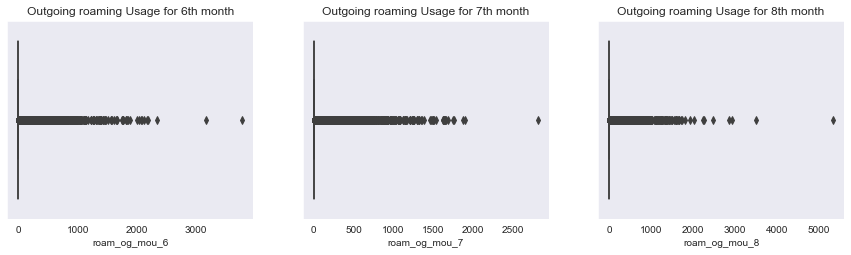

In [60]:
# Analysing the spread of the 'Roam_outgoing_Minutes of usage data' for 3 months in the plots below
plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(highvalue_cust['roam_og_mou_6'])
ax.set_title('Outgoing roaming Usage for 6th month',fontsize=12)
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(highvalue_cust['roam_og_mou_7'])
ax.set_title('Outgoing roaming Usage for 7th month',fontsize=12)
# subplot 3
plt.subplot(2, 3, 3)
ax = sns.boxplot(highvalue_cust['roam_og_mou_8'])
ax.set_title('Outgoing roaming Usage for 8th month',fontsize=12)
plt.show()

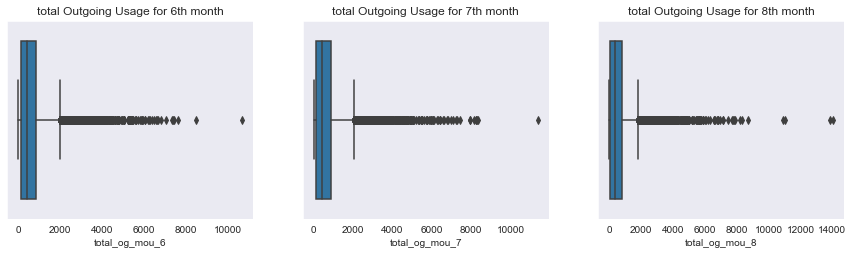

In [61]:
# Lets plot distribution of same fields for each month using box plot.
# Quantitative Variables

plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(highvalue_cust['total_og_mou_6'])
ax.set_title('total Outgoing Usage for 6th month',fontsize=12)
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(highvalue_cust['total_og_mou_7'])
ax.set_title('total Outgoing Usage for 7th month',fontsize=12)
# subplot 3
plt.subplot(2, 3, 3)
ax = sns.boxplot(highvalue_cust['total_og_mou_8'])
ax.set_title('total Outgoing Usage for 8th month',fontsize=12)
plt.show()

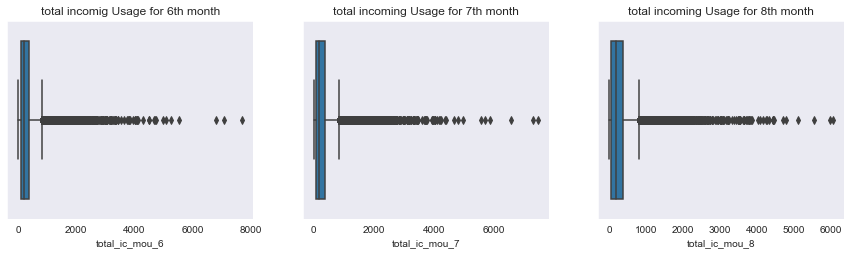

In [62]:
# Lets plot distribution of same fields for each month using box plot.
# Quantitative Variables

plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(highvalue_cust['total_ic_mou_6'])
ax.set_title('total incomig Usage for 6th month',fontsize=12)
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(highvalue_cust['total_ic_mou_7'])
ax.set_title('total incoming Usage for 7th month',fontsize=12)
# subplot 3
plt.subplot(2, 3, 3)
ax = sns.boxplot(highvalue_cust['total_ic_mou_8'])
ax.set_title('total incoming Usage for 8th month',fontsize=12)
plt.show()

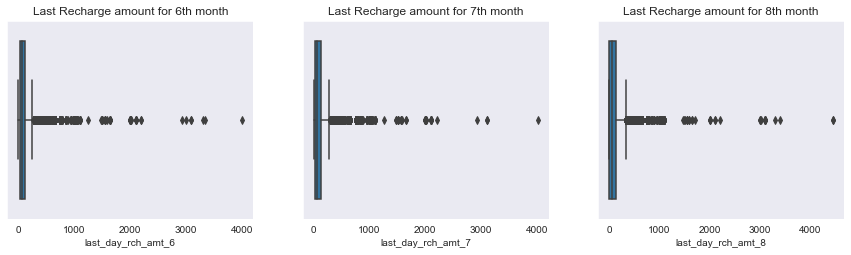

In [63]:
# Lets plot distribution of same fields for each month using box plot.
# Quantitative Variables

plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(highvalue_cust['last_day_rch_amt_6'])
ax.set_title('Last Recharge amount for 6th month',fontsize=12)
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(highvalue_cust['last_day_rch_amt_7'])
ax.set_title('Last Recharge amount for 7th month',fontsize=12)
# subplot 3
plt.subplot(2, 3, 3)
ax = sns.boxplot(highvalue_cust['last_day_rch_amt_8'])
ax.set_title('Last Recharge amount for 8th month',fontsize=12)
plt.show()


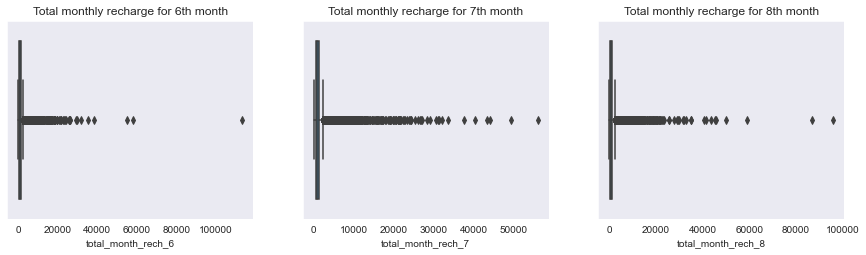

In [64]:
# Lets plot distribution of same fields for each month using box plot.
# Quantitative Variables
plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(highvalue_cust['total_month_rech_6'])
ax.set_title('Total monthly recharge for 6th month',fontsize=12)
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(highvalue_cust['total_month_rech_7'])
ax.set_title('Total monthly recharge for 7th month',fontsize=12)
# subplot 3
plt.subplot(2, 3, 3)
ax = sns.boxplot(highvalue_cust['total_month_rech_8'])
ax.set_title('Total monthly recharge for 8th month',fontsize=12)
plt.show()

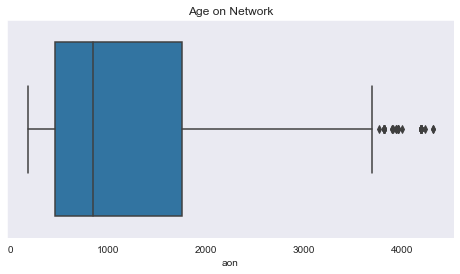

In [65]:
# Lets plot distribution of same fields for each month using box plot.
# Quantitative Variables

plt.figure(figsize=(8,4))
sns.set_style("dark")
ax = sns.boxplot(highvalue_cust['aon'])
ax.set_title('Age on Network',fontsize=12)
plt.show()

In [66]:
#sum of total isd MOU per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8'].sum()

,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8
churn,,,
0,54564.22,55537.33,55448.06
1,10583.71,7637.07,3022.98


In [67]:
#mean of total 3G usage per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'].mean()

,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
churn,,,
0,349.825292,383.548331,374.884935
1,281.407722,219.450729,87.399685


In [68]:
#mean of total 2G usage per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].mean()

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8
churn,,,
0,127.830679,128.229264,113.243187
1,111.748697,89.736321,23.152745


In [69]:
#mean of total std MOU per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['std_og_mou_6','std_og_mou_7','std_og_mou_8'].mean()

,std_og_mou_6,std_og_mou_7,std_og_mou_8
churn,,,
0,324.436966,353.660138,320.799988
1,603.294965,480.551340,155.853810


In [70]:
#sum of total special MOU per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8'].sum()

,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8
churn,,,
0,157036.08,195371.71,190126.94
1,17517.84,17894.78,6595.73


In [71]:
#mean of total incoming MOU per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.131789,306.840677,299.096525
1,231.451344,182.907534,63.444342


In [72]:
#mean of total outgoing MOU per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,593.763075,628.442026,581.998003
1,791.678435,627.508218,209.361368


In [73]:
#mean of total monthly recharge per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
churn,,,
0,649.574710,663.527830,613.701089
1,786.707087,626.290045,253.152806


In [74]:
#mean of outgoing in roaming usage per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'].mean()

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
churn,,,
0,24.337114,17.496533,17.760013
1,51.799316,50.134482,43.638824


In [75]:
#mean of maximum recharge amount per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'].mean()

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.049456,173.336575,166.767199
1,171.942237,159.388775,85.370750


In [76]:
#mean of last recharge amount churn vs Non-Churn
highvalue_cust.groupby(['churn'])['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'].mean()

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.586938,102.275508,97.416800
1,104.356002,78.684146,35.680049


In [77]:
#mean of local outgoing on same network usage per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8'].mean()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8
churn,,,
0,86.676673,89.304021,83.569354
1,59.736981,44.692946,16.067210


In [78]:
#mean of age on network churn vs Non-Churn
highvalue_cust.groupby(['churn'])['aon'].mean()

churn
0    1240.228120
1     860.952478
Name: aon, dtype: float64

# Observations:

# Train Data and Test Data

# Perform PCA on dataset before model building.

In [79]:
#copy the dataframe to another
highvalue_custcopy = highvalue_cust
print(highvalue_custcopy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 152 entries, last_date_of_month_6 to churn
dtypes: datetime64[ns](6), float64(120), int64(26)
memory usage: 35.0 MB
None


In [80]:
highvalue_custcopy.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,1
7,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1580.0,790.0,3638.0,1
8,2014-06-30,2014-07-31,2014-08-31,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.9

In [81]:
highvalue_custcopy.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001

In [82]:
#Remove aon column 
highvalue_custcopy.drop(['aon'], axis=1, inplace=True)

In [83]:
#Remove datetime columns from dataset to avoid errors further
datecolumns = list(highvalue_custcopy.select_dtypes(include=['datetime']).columns)
print(datecolumns)
highvalue_custcopy.drop(datecolumns, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [84]:
highvalue_custcopy.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,57.74,19.38,18.74,0.0,0.0,0.0,1580.0,790.0,3638.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0

In [86]:
highvalue_custcopy.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,57.74,19.38,18.74,0.0,0.0,0.0,1580.0,790.0,3638.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0

In [92]:
#import train test split 
from sklearn.model_selection import train_test_split
X = highvalue_custcopy.drop(['churn'], axis=1)
y = highvalue_custcopy['churn']    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [93]:
#minmax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [94]:
# fit transform the scaler on train
X_train = scaler.fit_transform(X_train)
# transform test using the already fit scaler
X_test = scaler.transform(X_test)

# Imbalance using smote

In [95]:
#print the stats
print("counts of label '1':",sum(y_train==1))
print("counts of label '0':",sum(y_train==0))

counts of label '1': 1691
counts of label '0': 19309


In [96]:
!pip install imblearn

In [99]:
#perform oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_smo, y_train_smo = sm.fit_resample(X_train, y_train)

In [100]:
#print stats after smote
print("counts of label '1':",sum(y_train_smo==1))
print("counts of label '0':",sum(y_train_smo==0))

counts of label '1': 19309
counts of label '0': 19309


In [101]:
#Perform PCA on sampled data
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [102]:
#Fit PCA on the train dataset
pca.fit(X_train_smo)

PCA(random_state=42, svd_solver='randomized')

In [103]:
pca.explained_variance_ratio_[:50]

array([5.67388323e-01, 1.27709350e-01, 8.78407046e-02, 2.85717373e-02,
       2.25880476e-02, 1.97072955e-02, 1.58988149e-02, 1.22292767e-02,
       1.20076312e-02, 8.05879651e-03, 7.68161756e-03, 6.90638806e-03,
       5.79420501e-03, 5.33864109e-03, 5.02100830e-03, 3.98640442e-03,
       3.88792616e-03, 3.15027781e-03, 3.02486279e-03, 2.75651026e-03,
       2.55399963e-03, 2.47250097e-03, 2.41956258e-03, 2.38166670e-03,
       2.26404272e-03, 2.10890387e-03, 1.93194677e-03, 1.73702146e-03,
       1.65693501e-03, 1.62139989e-03, 1.53186245e-03, 1.49032599e-03,
       1.39804138e-03, 1.33685311e-03, 1.21736530e-03, 1.14742967e-03,
       1.07929833e-03, 1.04496257e-03, 9.36449094e-04, 8.60509766e-04,
       8.46998542e-04, 7.66958747e-04, 7.02691381e-04, 6.77769852e-04,
       6.38081737e-04, 6.21422342e-04, 5.81134877e-04, 5.38548766e-04,
       5.32603381e-04, 4.85845774e-04])

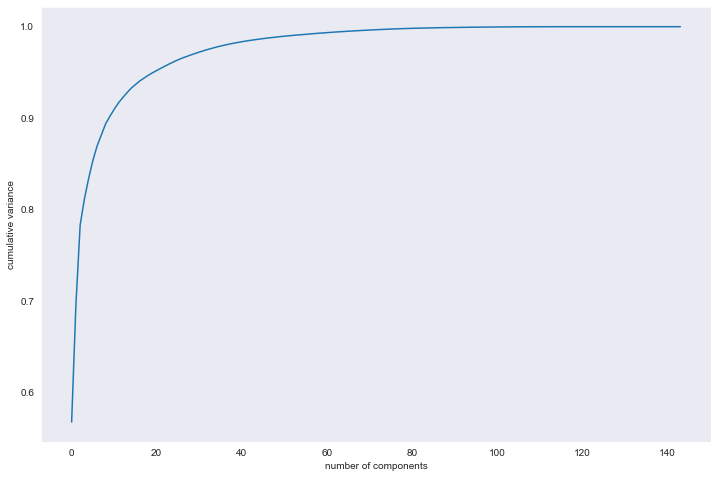

In [104]:
#Draw screeplot in between cumulative variance and number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance')
plt.show()

In [105]:
#Perform incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_again = IncrementalPCA(n_components=35)

In [106]:
#fit transform
X_train_pca = pca_again.fit_transform(X_train_smo)
X_train_pca.shape

(38618, 35)

In [107]:
#create correlation matrix for the principal components analysis
correlationmat = np.corrcoef(X_train_pca.transpose())
correlationmat_nodiag = correlationmat - np.diagflat(correlationmat.diagonal())
print("max corr:",correlationmat_nodiag.max(), ", min corr: ", correlationmat_nodiag.min(),)


max corr: 0.019248313482848722 , min corr:  -0.057606166792853075


In [108]:
#Apply selected components to the test data
X_test_pca = pca_again.transform(X_test)
X_test_pca.shape

(9001, 35)

# Logistic Regression

In [109]:
#import library 
#fit train model on train data

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
imlearner_pca2 = LogisticRegression(class_weight='balanced')
imlearner_pca2.fit(X_train_pca,y_train_smo)

LogisticRegression(class_weight='balanced')

In [110]:
#Predict on training set
dtrain_predictions = imlearner_pca2.predict(X_train_pca)
dtrain_predprob = imlearner_pca2.predict_proba(X_train_pca)[:,1]

In [111]:
#print some scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, dtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, dtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, dtrain_predprob))

Accuracy : 0.8269977730591951
Recall/Sensitivity : 0.8395566834118805
AUC Score (Train): 0.8985095385300063


In [112]:
#predict on test dataset.
#print all scores
predict_probs_test = imlearner_pca2.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, predict_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, predict_probs_test)))
print('precision score:',(metrics.precision_score(y_test, predict_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,predict_probs_test)))

Roc_auc_score : 0.8238895487415667
precision score: 0.29702495201535506
Sensitivity/Recall : 0.8253333333333334
Specificity: 0.8224457641498
False Positive Rate: 0.17755423585019997
Positive predictive value: 0.29702495201535506
Negative Predictive value: 0.9810611536793408
Accuracy : 0.8226863681813131


In [113]:
#check with probability cutoff of 0.5
y_train_predict = imlearner_pca2.predict_proba(X_train_pca)[:,1]
y_train_predict_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predict})
y_train_predict_final['Churn_Prob'] = y_train_predict
y_train_predict_final['predicted'] = y_train_predict_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predict_final.head()

,Churn,Churn_Prob,predicted
0,0,0.569400,1
1,0,0.133546,0
2,0,0.476801,0
3,0,0.000693,0
4,0,0.059741,0


In [114]:
#define function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic sample')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_predict_final.Churn, y_train_predict_final.Churn_Prob, drop_intermediate = False )

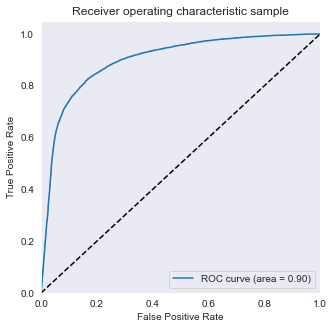

In [116]:
#Draw roc curve
draw_roc(y_train_predict_final.Churn, y_train_predict_final.Churn_Prob)

In [117]:
#create columns with different probability cutoffs 
number = [float(x)/10 for x in range(10)]
for i in number:
    y_train_predict_final[i]= y_train_predict_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_predict_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.569400,1,1,1,1,1,1,1,0,0,0,0
1,0,0.133546,0,1,1,0,0,0,0,0,0,0,0
2,0,0.476801,0,1,1,1,1,1,0,0,0,0,0
3,0,0.000693,0,1,0,0,0,0,0,0,0,0,0
4,0,0.059741,0,1,0,0,0,0,0,0,0,0,0


In [118]:
# calculate accuracy sensitivity and specificity
df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predict_final.Churn, y_train_predict_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    df.loc[i] =[ i ,accuracy,sensi,speci]
print(df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.665286  0.980165  0.350407
0.2   0.2  0.734968  0.953545  0.516391
0.3   0.3  0.783831  0.924854  0.642809
0.4   0.4  0.813455  0.887876  0.739034
0.5   0.5  0.826998  0.839557  0.814439
0.6   0.6  0.825133  0.774872  0.875395
0.7   0.7  0.814698  0.712932  0.916464
0.8   0.8  0.774820  0.598270  0.951370
0.9   0.9  0.582811  0.178466  0.987156


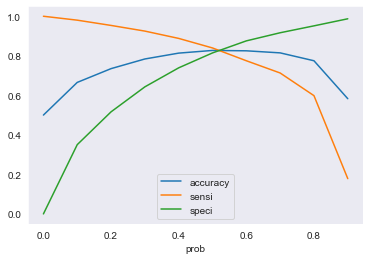

In [119]:
#plot accuracy sensitivity and specificity
df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [120]:
#apply cutoff probability
y_train_predict_final['final_predicted'] = y_train_predict_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
y_train_predict_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.569400,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.133546,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.476801,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.000693,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.059741,0,1,0,0,0,0,0,0,0,0,0,0


In [121]:
#predict train dataset with optimal cutoff
y_train_predict = imlearner_pca2.predict_proba(X_train_pca)[:,1]
y_train_predict_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predict})
y_train_predict_final['Churn_Prob'] = y_train_predict
y_train_predict_final['predicted'] = y_train_predict_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_predict_final.head()

,Churn,Churn_Prob,predicted
0,0,0.569400,1
1,0,0.133546,0
2,0,0.476801,1
3,0,0.000693,0
4,0,0.059741,0


In [122]:
#find and print all scores of train dataset
conf = metrics.confusion_matrix(y_train_predict_final.Churn, y_train_predict_final.predicted)
TP = conf[1,1] # true positive 
TN = conf[0,0] # true negatives
FP = conf[0,1] # false positives
FN = conf[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_predict_final.Churn, y_train_predict_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_predict_final.Churn, y_train_predict_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.820731265213113
precision score: 0.7947363411383971
Sensitivity/Recall : 0.864829872080377
Specificity: 0.776632658345849
False Positive Rate: 0.22336734165415092
Positive predictive value: 0.7947363411383971
Negative Predictive value: 0.8517550834942633


In [123]:
#predict test datset with optimal cutoff obtained previously
y_test_predict = imlearner_pca2.predict_proba(X_test_pca)[:,1]
y_test_predict_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_predict})
y_test_predict_final['Churn_Prob'] = y_test_predict
y_test_predict_final['predicted'] = y_test_predict_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_test_predict_final.head()

,Churn,Churn_Prob,predicted
20296,1,0.670780,1
8279,1,0.521607,1
72269,0,0.066098,0
65602,0,0.332471,0
42758,1,0.824863,1


In [124]:
#find and print all scores of test dataset
conf = metrics.confusion_matrix(y_test_predict_final.Churn, y_test_predict_final.predicted)
TP = conf[1,1] # true positive 
TN = conf[0,0] # true negatives
FP = conf[0,1] # false positives
FN = conf[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_predict_final.Churn, y_test_predict_final.predicted))
print('precision score :',(metrics.precision_score(y_test_predict_final.Churn, y_test_predict_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8112859855371066
precision score : 0.2590311986863711
Sensitivity/Recall : 0.8413333333333334
Specificity: 0.7812386377408799
False Positive Rate: 0.2187613622591201
Positive predictive value: 0.2590311986863711
Negative Predictive value: 0.9818735719725818


From above stats with logistics regression on Test Dataset we got the following results:

Sensitivity/Recall : 0.8472834067547724
Specificity: 0.7708609271523179
Stats On Train dataset was:

Sensitivity/Recall : 0.8716627634660421
Specificity: 0.7788706739526412

# Random forest Modeling

Tuning max_depth

In [126]:
#find the optimum values for max_depth
# GridSearchCV to find optimal n_estimators

#import the libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# mention number of folds for k-fold CV
num_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(10, 30, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=num_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='accuracy')

In [127]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,22.765510,2.725306,0.189865,0.018544,10,{'max_depth': 10},0.877136,0.890083,0.881279,0.887091,0.881134,0.883345,0.004629,4,0.910144,0.914708,0.912054,0.912931,0.914355,0.912839,0.001654
1,26.404165,0.431190,0.263108,0.038855,15,{'max_depth': 15},0.933325,0.933843,0.930735,0.932669,0.929950,0.932104,0.001506,3,0.978119,0.978669,0.977763,0.977343,0.978346,0.978048,0.000460
2,26.678899,1.419290,0.258377,0.019747,20,{'max_depth': 20},0.945365,0.943941,0.942905,0.945746,0.940956,0.943783,0.001741,2,0.992944,0.993818,0.993300,0.993429,0.993203,0.993339,0.000288
3,25.838903,0.398344,0.247676,0.001666,25,{'max_depth': 25},0.946271,0.946530,0.944200,0.948854,0.944063,0.945984,0.001760,1,0.998608,0.998964,0.998543,0.998867,0.998641,0.998725,0.000162


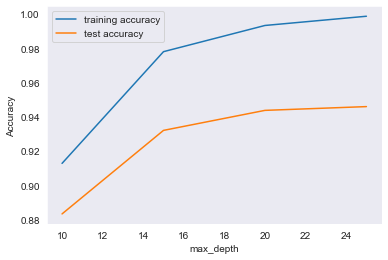

In [128]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [129]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
num_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 150, 25)}

# instantiate the model specifying the max depth
rf = RandomForestClassifier(max_depth=20)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=num_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=20),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='accuracy')

In [130]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.947750,0.411256,0.128031,0.005947,50,{'n_estimators': 50},0.942258,0.943294,0.942258,0.942768,0.941474,0.942410,0.000605,3,0.992685,0.993947,0.993785,0.992653,0.993235,0.993261,0.000538
1,19.532545,0.921112,0.182798,0.004496,75,{'n_estimators': 75},0.943811,0.940834,0.939927,0.946264,0.940826,0.942333,0.002364,4,0.992749,0.993591,0.992879,0.992167,0.993041,0.992885,0.000460
2,25.785722,0.676938,0.254689,0.018987,100,{'n_estimators': 100},0.944847,0.942905,0.942776,0.946005,0.939531,0.943213,0.002205,2,0.992749,0.993332,0.992976,0.993624,0.993397,0.993216,0.000312
3,32.624515,0.802441,0.329637,0.035581,125,{'n_estimators': 125},0.944588,0.943682,0.942776,0.944970,0.942121,0.943627,0.001070,1,0.992652,0.993494,0.993235,0.993365,0.993235,0.993196,0.000288


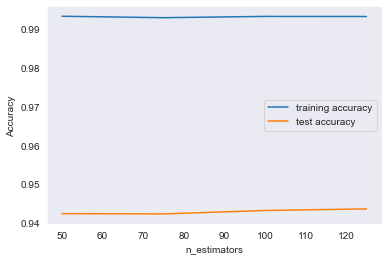

In [131]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [132]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
num_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=80)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=num_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, n_estimators=80),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [133]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.866328,0.550206,0.201957,0.020600,4,{'max_features': 4},0.946142,0.943423,0.942517,0.944970,0.940956,0.943601,0.001818,1,0.993494,0.993105,0.993170,0.993170,0.992199,0.993028,0.000436
1,33.012634,1.591411,0.194092,0.007418,8,{'max_features': 8},0.942646,0.943294,0.939021,0.946523,0.940567,0.942410,0.002555,3,0.992134,0.993138,0.992555,0.993170,0.992782,0.992756,0.000386
2,58.614478,3.417234,0.191410,0.010337,14,{'max_features': 14},0.942258,0.942905,0.941481,0.946394,0.941215,0.942851,0.001869,2,0.992005,0.993429,0.992782,0.992361,0.992232,0.992562,0.000502
3,82.869047,3.288615,0.200488,0.023504,20,{'max_features': 20},0.940186,0.941869,0.937856,0.941215,0.938236,0.939873,0.001589,4,0.991455,0.992652,0.992944,0.991908,0.991358,0.992063,0.000635
4,99.654141,5.856980,0.191882,0.005451,24,{'max_features': 24},0.937468,0.939927,0.938762,0.942250,0.937460,0.939173,0.001792,5,0.991875,0.992847,0.991940,0.991682,0.990743,0.991817,0.000671


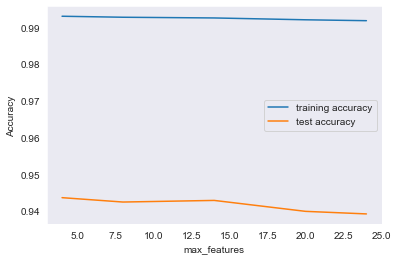

In [134]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [135]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# mention number of folds for k-fold CV
num_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=num_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=5,
                                              n_estimators=80),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [136]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.270893,0.973801,0.169554,0.054389,100,{'min_samples_leaf': 100},0.832600,0.846064,0.842051,0.840088,0.845138,0.841188,0.004798,1,0.854600,0.850068,0.850651,0.849167,0.852371,0.851371,0.001924
1,12.393139,0.314055,0.124670,0.005108,150,{'min_samples_leaf': 150},0.822631,0.836613,0.837131,0.832837,0.831413,0.832125,0.005222,2,0.843983,0.837218,0.840908,0.839391,0.838712,0.840042,0.002300
2,11.836405,0.517118,0.125302,0.016177,200,{'min_samples_leaf': 200},0.815640,0.833376,0.832211,0.825715,0.827269,0.826842,0.006300,3,0.833301,0.832913,0.834660,0.832303,0.832400,0.833115,0.000853
3,11.908064,0.627053,0.144266,0.037743,250,{'min_samples_leaf': 250},0.813439,0.828457,0.825091,0.821572,0.820407,0.821793,0.005041,4,0.830550,0.825338,0.826212,0.824955,0.827383,0.826888,0.002012
4,11.836500,0.565223,0.128422,0.016773,300,{'min_samples_leaf': 300},0.808907,0.824443,0.818617,0.815227,0.816652,0.816769,0.005030,5,0.825791,0.823655,0.822101,0.819324,0.819065,0.821987,0.002565


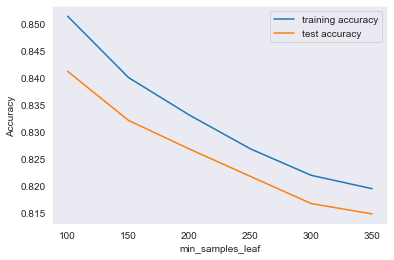

In [137]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min_samples_split


In [138]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
num_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(50, 300, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=num_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=5,
                                              min_samples_leaf=100,
                                              n_estimators=80),
             param_grid={'min_samples_split': range(50, 300, 50)},
             return_train_score=True, scoring='accuracy')

In [139]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.185273,0.700814,0.143340,0.008261,50,{'min_samples_split': 50},0.831434,0.844252,0.842957,0.845267,0.841124,0.841007,0.004983,4,0.853111,0.850003,0.851298,0.852112,0.850817,0.851468,0.001069
1,13.772051,0.596342,0.132246,0.004703,100,{'min_samples_split': 100},0.831823,0.847488,0.843734,0.841512,0.842937,0.841499,0.005226,3,0.853629,0.852237,0.853208,0.849911,0.852727,0.852342,0.001302
2,14.196179,0.780505,0.134634,0.005815,150,{'min_samples_split': 150},0.832859,0.847747,0.845805,0.843843,0.842419,0.842535,0.005162,2,0.854664,0.852528,0.850812,0.850979,0.852436,0.852284,0.001387
3,13.522706,0.437257,0.141621,0.010870,200,{'min_samples_split': 200},0.831823,0.848395,0.847747,0.845915,0.841642,0.843104,0.006113,1,0.854114,0.852949,0.853887,0.851529,0.850267,0.852549,0.001459
4,14.127601,0.832099,0.158391,0.028167,250,{'min_samples_split': 250},0.827292,0.843604,0.840756,0.840606,0.840088,0.838469,0.005722,5,0.849971,0.848126,0.847996,0.848908,0.849037,0.848808,0.000713


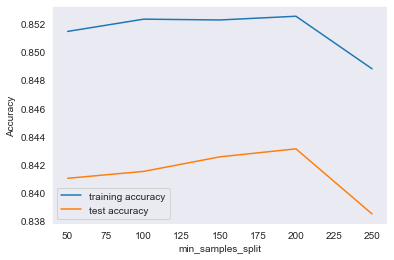

In [140]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Fitting the final model with the best parameters obtained and we will find the optimal hyperparameters using GridSearchCV.

In [141]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=5,
                             n_estimators=80,
                             random_state=10)

In [142]:
# fit
rf_pca=rfc.fit(X_train_pca,y_train_smo)
#Predict on training set
rtrain_predict = rf_pca.predict(X_train_pca)
rtrain_predictprob = rf_pca.predict_proba(X_train_pca)[:,1]

In [ ]:
#print scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, rtrain_predict))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, rtrain_predict))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, rtrain_predictprob))

In [143]:
#predict test dataset
predict_probs_test = rf_pca.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, predict_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, predict_probs_test)))
print('precision score:',(metrics.precision_score(y_test, predict_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,predict_probs_test)))

Roc_auc_score : 0.8094629337858038
precision score: 0.3321637426900585
Sensitivity/Recall : 0.7573333333333333
Specificity: 0.8615925342382742
False Positive Rate: 0.13840746576172586
Positive predictive value: 0.3321637426900585
Negative Predictive value: 0.9750377177341928
Accuracy : 0.8529052327519164


In [144]:
#check with probability cutoff of 0.5
y_train_predictrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predictrf_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predictrf})
y_train_predictrf_final['Churn_Prob'] = y_train_predictrf
y_train_predictrf_final['predicted'] = y_train_predictrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predictrf_final.head()

,Churn,Churn_Prob,predicted
0,0,0.367341,0
1,0,0.166642,0
2,0,0.498558,0
3,0,0.343092,0
4,0,0.080522,0


In [145]:
#create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predictrf_final[i]= y_train_predictrf_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_predictrf_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.367341,0,1,1,1,1,0,0,0,0,0,0
1,0,0.166642,0,1,1,0,0,0,0,0,0,0,0
2,0,0.498558,0,1,1,1,1,1,0,0,0,0,0
3,0,0.343092,0,1,1,1,1,0,0,0,0,0,0
4,0,0.080522,0,1,0,0,0,0,0,0,0,0,0


In [146]:
#calculate accuracy sensitivity and specificity
df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predictrf_final.Churn, y_train_predictrf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    df.loc[i] =[ i ,accuracy,sensi,speci]
print(df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.577684  0.999793  0.155575
0.2   0.2  0.718344  0.994044  0.442643
0.3   0.3  0.808561  0.964939  0.652183
0.4   0.4  0.847014  0.912114  0.781915
0.5   0.5  0.858020  0.847584  0.868455
0.6   0.6  0.842535  0.764462  0.920607
0.7   0.7  0.801336  0.646900  0.955772
0.8   0.8  0.727795  0.473044  0.982547
0.9   0.9  0.580584  0.162308  0.998861


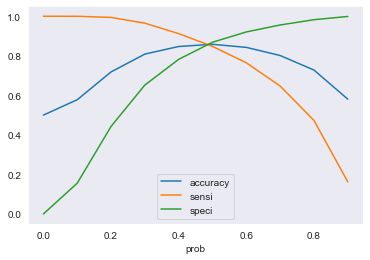

In [147]:
#plot accuracy sensitivity and specificity
df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.45 is the optimum point for cutoff probability.

In [148]:
#apply cutoff probability
y_train_predictrf_final['final_predicted'] = y_train_predictrf_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
#predict on train dataset with optimal cutoff probability
y_train_predictrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predictrf_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predictrf})
y_train_predictrf_final['Churn_Prob'] = y_train_predictrf
y_train_predictrf_final['predicted'] = y_train_predictrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_predictrf_final.head()

,Churn,Churn_Prob,predicted
0,0,0.367341,0
1,0,0.166642,0
2,0,0.498558,1
3,0,0.343092,0
4,0,0.080522,0


In [149]:
#find and print all scores of train dataset
confusion = metrics.confusion_matrix(y_train_predictrf_final.Churn, y_train_predictrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_predictrf_final.Churn, y_train_predictrf_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_predictrf_final.Churn, y_train_predictrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8550416904034388
precision score: 0.8378258512787661
Sensitivity/Recall : 0.8805220363561034
Specificity: 0.8295613444507742
False Positive Rate: 0.17043865554922574
Positive predictive value: 0.8378258512787661
Negative Predictive value: 0.874106412005457


In [150]:
#predict on test datset with optimal cutoff obtained previous
y_test_predictrf = rf_pca.predict_proba(X_test_pca)[:,1]
y_test_predictrf_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_predictrf})
y_test_predictrf_final['Churn_Prob'] = y_test_predictrf
y_test_predictrf_final['predicted'] = y_test_predictrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_test_predictrf_final.head()

,Churn,Churn_Prob,predicted
20296,1,0.681630,1
8279,1,0.498082,1
72269,0,0.513688,1
65602,0,0.237386,0
42758,1,0.630246,1


In [151]:
#find and print all scores of test dataset
confusion = metrics.confusion_matrix(y_test_predictrf_final.Churn, y_test_predictrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_predictrf_final.Churn, y_test_predictrf_final.predicted))
print('precision score :',(metrics.precision_score(y_test_predictrf_final.Churn, y_test_predictrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8077075909990707
precision score : 0.2908288376655223
Sensitivity/Recall : 0.7906666666666666
Specificity: 0.824748515331475
False Positive Rate: 0.17525148466852503
Positive predictive value: 0.2908288376655223
Negative Predictive value: 0.9774490089054869


Train and test Recall score of Random forest:
Train Sensitivity/Recall:0.892583918813427
Test Sensitivity/Recall:0.8002936857562408
Train and test Recall score with logistics regression :
Train Sensitivity/Recall: 0.8716627634660421
Test Sensitivity/Recall : 0.8472834067547724

Sensitivity score has to be considered here as Telecom company wont afford to churn high value customer.Hence we will try to find all high value customers who may leave in future. So, we will consider overall recall score for good model. So Logistics Regression will be chosen.
As we can see that Train Recall score of Random forest is better than Logistics Regression but Test Recall score of Logistics Regression is better as compared to Random forest. Difference in between Train and test score is less for Logistics Regression which seems model is stable.

Build another model to identify important predictor attributes which help the business understand indicators of churn.
A good choice to identify important variables is a logistic regression model or a model from the tree family.
In case of logistic regression, handle multi-collinearity.


# Fitting the final model with the best parameters

In [152]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=5,
                             n_estimators=80)

In [153]:
# fit
rfc.fit(X_train_smo,y_train_smo)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=100,
                       min_samples_split=100, n_estimators=80)

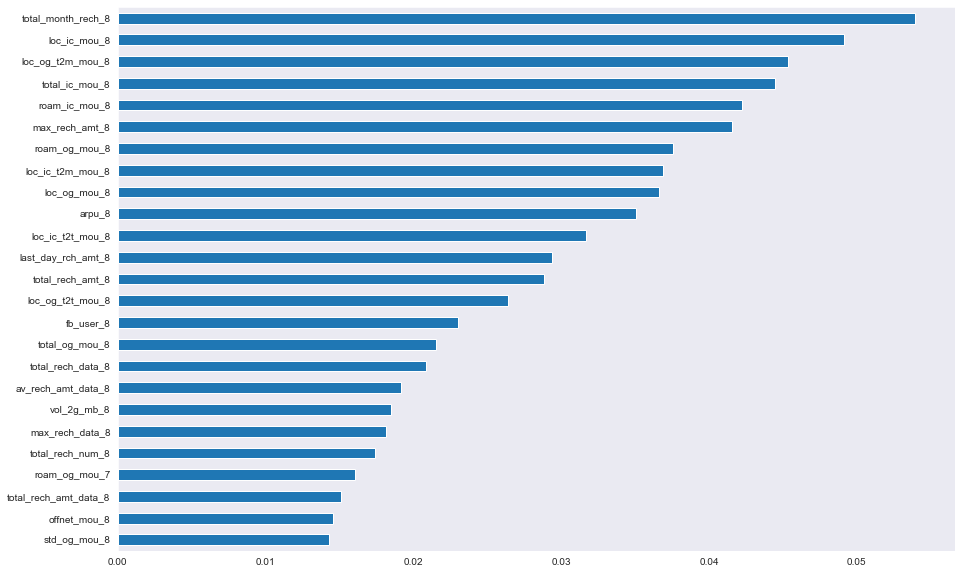

In [156]:
plt.figure(figsize=(15,10))
important_features = pd.Series(rfc.feature_importances_, index=X.columns)
important_features.nlargest((25)).sort_values().plot(kind='barh', align='center')
plt.show()

# Insights and Conclusion